In [229]:
import spotipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID = "30cac4debe7f423eb830668305930adf"
SPOTIPY_CLIENT_SECRET = "62735ac866f64d7f96362f646356f42a"

client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [230]:
"""
FIND TRACK ID 
"""
track_name = "Love Story"
# artist_name = "Metallica"  # Optional, but helps narrow down the search
results = sp.search(q='track:' + track_name, type='track')

# Extract the Track ID
if results['tracks']['items']:
    # Assuming the first search result is the correct track
    track_id = results['tracks']['items'][0]['id']
    print(f"Track ID: {track_id}")
else:
    print("No results found.")
    

"""
FIND TRACK INFO
"""

sp.audio_features(["3YRCqOhFifThpSRFJ1VWFM"])

Track ID: 1vrd6UOGamcKNGnSHJQlSt


[{'danceability': 0.294,
  'energy': 0.641,
  'key': 11,
  'loudness': -9.316,
  'mode': 1,
  'speechiness': 0.0291,
  'acousticness': 0.0163,
  'instrumentalness': 0.22,
  'liveness': 0.112,
  'valence': 0.226,
  'tempo': 79.759,
  'type': 'audio_features',
  'id': '3YRCqOhFifThpSRFJ1VWFM',
  'uri': 'spotify:track:3YRCqOhFifThpSRFJ1VWFM',
  'track_href': 'https://api.spotify.com/v1/tracks/3YRCqOhFifThpSRFJ1VWFM',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3YRCqOhFifThpSRFJ1VWFM',
  'duration_ms': 536067,
  'time_signature': 4}]

In [204]:
# Define target values for the features
features_targets = {
    'target_acousticness': 0.4,
    'target_danceability': 0.7,
    'target_energy': 0.8,
    'target_instrumentalness': 0.0,
    'target_key': 5,
    'target_liveness': 0.1,
    'target_loudness': -5.0,
    'target_speechiness': 0.05,
    'target_tempo': 120,
    'target_valence': 0.5,
    'min_acousticness': 0.45, 
    'max_acousticness' : 0.47,
    'target_mode': 0,
    'target_popularity': 0,
    'target_duration_ms' : 0
}

# Get recommendations based on the specified features
recommendations = sp.recommendations(seed_genres=["pop"], limit=10, **features_targets)

# Extract track IDs from the recommendations
track_ids = [track['id'] for track in recommendations['tracks']]

# Fetch audio features for these tracks
audio_features = sp.audio_features(track_ids)

# Print out a vector of features for each track
for track, features in zip(recommendations['tracks'], audio_features):
    track_name = track['name']
    features_vector = [
        features['acousticness'],
        features['danceability'],
        features['energy'],
        features['instrumentalness'],
        features['key'],
        features['liveness'],
        features['loudness'],
        features['speechiness'],
        features['tempo'],
        features['valence']
    ]
    print(f"Track: {track_name} - Features Vector: {features_vector}")

KeyboardInterrupt: 

# Experiments with current system (based on track recommendation)

## Initialization

In [231]:
genres = sp.recommendation_genre_seeds()
print(genres['genres'])

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [232]:
features_range = {
    'acousticness': 1.0,  # A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
    'danceability': 1.0,  # How suitable a track is for dancing based on a combination of musical elements.
    'energy': 1.0,  # A measure from 0.0 to 1.0 representing a perceptual measure of intensity and activity.
    'instrumentalness': 1.0,  # Predicts whether a track contains no vocals.
    # 'key': 11,  # The key the track is in. Integers map to pitches using standard Pitch Class notation.
    'liveness': 1.0,  # Detects the presence of an audience in the recording.
    'loudness': 60,  # The overall loudness of a track in decibels (dB).
    # 'mode': 1,  # Modality of the track. Major is represented by 1 and minor is 0.
    'speechiness': 1.0,  # Speechiness detects the presence of spoken words in a track.
    'tempo': 250.0,  # The overall estimated tempo of a track in beats per minute (BPM).
    'valence': 1.0  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
    # 'popularity': 100,  # The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
}

In [233]:
def generate_random_feature_value(center, stddev=0.05, feature_type='continuous'):
    if feature_type == 'continuous':
        return np.random.normal(loc=center, scale=stddev)
    elif feature_type == 'discrete':
        return int(np.round(np.random.normal(loc=center, scale=stddev)))
    else:
        raise ValueError("Invalid feature_type. Choose 'continuous' or 'discrete'.")

def calculate_likelihood(value, center, stddev=0.05, feature_type='continuous'):
    """
    Calculate the likelihood of a given value in a specified normal distribution.

    Parameters:
    - value: The value for which to calculate the likelihood.
    - center: The mean (center) of the distribution.
    - stddev: The standard deviation of the distribution. Default is 0.05.
    - feature_type: The type of feature ('continuous' or 'discrete').

    Returns:
    - The likelihood (density) of the given value in the distribution.
    """
    if feature_type == 'continuous':
        # For continuous features, directly use the PDF of the normal distribution.
        likelihood = norm.pdf(value, loc=center, scale=stddev)
    elif feature_type == 'discrete':
        # For discrete features, calculate the PDF at the nearest integer.
        discrete_value = int(np.round(value))
        likelihood = norm.pdf(discrete_value, loc=center, scale=stddev)
    else:
        raise ValueError("Invalid feature_type. Choose 'continuous' or 'discrete'.")
    
    return likelihood

# function to generate a random value for each feature
def generate_random_feature_values(centers, std_devs):
    random_values = {}
    for feature, center in centers.items():
        feature_type = 'discrete' if feature in ['key', 'mode'] else 'continuous'
        random_values[feature] = generate_random_feature_value(center, stddev=std_devs[feature], feature_type=feature_type)
    return random_values


def calculate_all_log_likelihoods(centers, std_devs, values):
    """
    Assuming that all features are independent, calculate the likelihood of the current value. 
    """
    total_likelihood = 1
    for feature, center in centers.items():
        feature_type = 'discrete' if feature in ['key', 'mode'] else 'continuous'
        curr_likelihood = calculate_likelihood(value=values[feature], center=center, stddev=std_devs[feature], feature_type=feature_type)
        total_likelihood += (np.log(curr_likelihood))
    
    return total_likelihood

## Generate simulated "initial" songs

In [234]:
genre_set = ['acoustic', 'folk', 'pop', 'rock-n-roll']
true_centers = {
    'acousticness': 0.2,
    'danceability': 0.7,
    'energy': 0.8,
    'instrumentalness': 0.1,
    # 'key': 5,  # Discrete
    'liveness': 0.1,
    'loudness': -5.0,
    'speechiness': 0.05,
    'tempo': 120,
    'valence': 0.3
    # 'mode': 0,  # Discrete, binary
    # 'popularity': 50  # Assuming a median popularity for demonstration
}

std_devs = {
    'acousticness': 0.05,
    'danceability': 0.05,
    'energy': 0.05,
    'instrumentalness': 0.01,
    # 'key': 1,  # Discrete, but simulated with spread
    'liveness': 0.05,
    'loudness': 2.0,
    'speechiness': 0.01,
    'tempo': 10,
    'valence': 0.05
    # 'mode': 0.5,  # Not applicable for binary, but included for consistency
    # 'popularity': 10
}

# Generate random values for all features
random_feature_values = generate_random_feature_values(true_centers, std_devs)
random_feature_values
# random_feature_values_scaled = {}


# for key, val in random_feature_values.items():
#     random_feature_values_scaled.update({key : (val / features_range[key])})

# random_feature_values_scaled

{'acousticness': 0.19952839189666605,
 'danceability': 0.6284005376624031,
 'energy': 0.7694273881867659,
 'instrumentalness': 0.10403237470531147,
 'liveness': 0.1668623390302651,
 'loudness': -4.005326308991496,
 'speechiness': 0.054890523871215784,
 'tempo': 95.48598142780685,
 'valence': 0.26466773398406485}

In [235]:
recommendations = sp.recommendations(seed_genres=["pop", 'rock-n-roll'], **random_feature_values)

# Extract track IDs from the recommendations
track_ids = [track['id'] for track in recommendations['tracks']]

# Fetch audio features for these tracks
audio_features = sp.audio_features(track_ids)

track_likelihoods = []

# Print out a vector of features for each track
for track, features in zip(recommendations['tracks'], audio_features):
    track_name = track['name']
    features_vector = {
        'acousticness' : features['acousticness'],
        'danceability' : features['danceability'],
        'energy' : features['energy'],
        'instrumentalness' : features['instrumentalness'],
        'liveness' : features['liveness'],
        'loudness' : features['loudness'],
        'speechiness' : features['speechiness'],
        'tempo' : features['tempo'],
        'valence' : features['valence']
        # features['popularity'] / features_range['popularity']
    }
    
    # difference = np.linalg.norm(np.array(features_vector) - np.array(list(random_feature_values_scaled.values())))
    # if difference < 0.5: 
    #     accept_set.append(track['id'])
    likelihood = calculate_all_log_likelihoods(values=features_vector, centers=true_centers, std_devs=std_devs)
    track_likelihoods.append((track_id, likelihood))
    print(f"Track: {track_name} - Features Likelihood: {likelihood}")
    # print(f"Track: {track_name} - Features Vector: {features_vector}")
    
track_likelihoods.sort(key=lambda x: x[1], reverse=True)
top_five_tracks = track_likelihoods[:5]
accept_set = [track_id for track_id, _ in top_five_tracks]

Track: Let You Down - Features Likelihood: -76.16333737764991
Track: American Pie - Features Likelihood: -106.05545407764988
Track: Civil War - Features Likelihood: -39.2765265026499
Track: Run to the Hills - 1998 Remaster - Features Likelihood: -124.7392267426499
Track: Mi Gente - Features Likelihood: -54.64511614389992
Track: Let Her Go - Features Likelihood: -75.60329506264989
Track: What Lovers Do (feat. SZA) - Features Likelihood: -53.161700622827915
Track: Who Do You Think Of? - Features Likelihood: -92.11231669264993
Track: I Won't Back Down - Features Likelihood: -142.34929755369993
Track: Let You Love Me - Features Likelihood: -162.11184826264994
Track: Slow Motion - Features Likelihood: -117.6823935608499
Track: Mama, I'm Coming Home - Features Likelihood: -88.9097080176499
Track: Folsom Prison Blues - Live - Features Likelihood: -237.55076296264997
Track: California Dreamin' - Features Likelihood: -75.4042123376499
Track: White Room - Features Likelihood: -65.75515440264992


## Spotify's naive recommendation based on accepted songs

AT ITERATION 0, TRACK_IDS: 10
AT ITERATION 1, TRACK_IDS: 10


/var/folders/tl/4hmmdc557x30002rq60f6vfm0000gn/T/ipykernel_98636/1543426554.py:51: RuntimeWarning: divide by zero encountered in log
  total_likelihood += (np.log(curr_likelihood))


AT ITERATION 2, TRACK_IDS: 10
AT ITERATION 3, TRACK_IDS: 10
AT ITERATION 4, TRACK_IDS: 10
AT ITERATION 5, TRACK_IDS: 10
AT ITERATION 6, TRACK_IDS: 10
AT ITERATION 7, TRACK_IDS: 10
AT ITERATION 8, TRACK_IDS: 10
AT ITERATION 9, TRACK_IDS: 10
AT ITERATION 10, TRACK_IDS: 10
AT ITERATION 11, TRACK_IDS: 10
AT ITERATION 12, TRACK_IDS: 10
AT ITERATION 13, TRACK_IDS: 10
AT ITERATION 14, TRACK_IDS: 10
AT ITERATION 15, TRACK_IDS: 10
AT ITERATION 16, TRACK_IDS: 10
AT ITERATION 17, TRACK_IDS: 10
AT ITERATION 18, TRACK_IDS: 10
AT ITERATION 19, TRACK_IDS: 10
AT ITERATION 20, TRACK_IDS: 10
AT ITERATION 21, TRACK_IDS: 10
AT ITERATION 22, TRACK_IDS: 10
AT ITERATION 23, TRACK_IDS: 10
AT ITERATION 24, TRACK_IDS: 10
AT ITERATION 25, TRACK_IDS: 10
AT ITERATION 26, TRACK_IDS: 10
AT ITERATION 27, TRACK_IDS: 10
AT ITERATION 28, TRACK_IDS: 10
AT ITERATION 29, TRACK_IDS: 10
AT ITERATION 30, TRACK_IDS: 10
AT ITERATION 31, TRACK_IDS: 10
AT ITERATION 32, TRACK_IDS: 10
AT ITERATION 33, TRACK_IDS: 10
AT ITERATION 34,

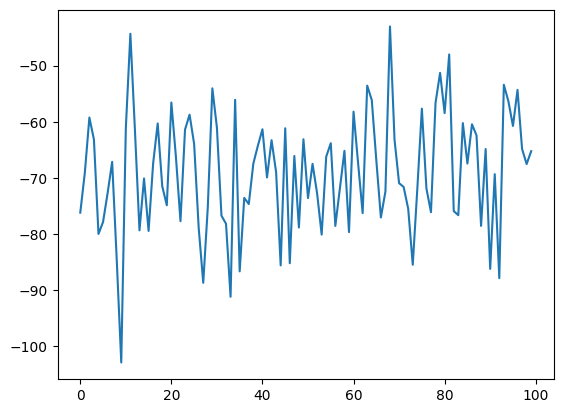

In [236]:
average_lst = []

for i in range(100):
    recommendations = sp.recommendations(seed_tracks=accept_set, limit=10)

    # Sanity Clear...
    track_ids = []
    track_ids = [track['id'] for track in recommendations['tracks']]
    print(f"AT ITERATION {i}, TRACK_IDS: {len(track_ids)}")
    
    # Fetch audio features for these tracks
    audio_features = sp.audio_features(track_ids)

    track_likelihoods = []

    # Print out a vector of features for each track
    for track, features in zip(recommendations['tracks'], audio_features):
        track_name = track['name']
        features_vector = {
            'acousticness' : features['acousticness'],
            'danceability' : features['danceability'],
            'energy' : features['energy'],
            'instrumentalness' : features['instrumentalness'],
            'liveness' : features['liveness'],
            'loudness' : features['loudness'],
            'speechiness' : features['speechiness'],
            'tempo' : features['tempo'],
            'valence' : features['valence']
            # features['popularity']
        }
        
        # difference = np.linalg.norm(np.array(features_vector) - np.array(list(random_feature_values_scaled.values())))
        # if difference < 0.5: 
        #     accept_set.append(track['id'])
        likelihood = calculate_all_log_likelihoods(values=features_vector, centers=true_centers, std_devs=std_devs)
        track_likelihoods.append((track_id, likelihood))
        # print(f"Track: {track_name} - Features Likelihood: {likelihood}")
        # print(f"Track: {track_name} - Features Vector: {features_vector}")
        
    track_likelihoods.sort(key=lambda x: x[1], reverse=True)
    
    top_five_tracks = track_likelihoods[:5]
    top_five_likelihoods = [likelihood for _, likelihood in top_five_tracks]
    
    average_lst.append(np.mean(top_five_likelihoods))
    accept_set = [track_id for track_id, _ in top_five_tracks]

plt.plot(average_lst)

In [237]:
calculate_all_log_likelihoods(centers=true_centers, std_devs=std_devs, values=true_centers)

13.92282266735009